In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
acc_df = pd.read_csv("Resources/accepted2.csv")

acc_df1 = acc_df.drop(["mths_since_last_delinq","mths_since_last_record","dti_joint","annual_inc_joint"], axis=1)

acc_df2 = acc_df1.dropna()


pd.set_option('display.max_columns', None)
acc_df3 = acc_df2.rename(columns={"addr_state": "State"})
 
acc_df3

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,title,zip_code,State,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,6500,36 months,9.75,208.98,3 years,RENT,80000.0,Not Verified,Fully Paid,n,Home improvement,930xx,CA,9.17,0.0,675,679,0.0,8.0,1.0,5965,38.2,31.0,w,0.00,0.00,6786.02000,6786.02,6500.00,286.02,0.00,0.0,0.0,5938.55,729,725,0.0,0.0,0.0,14444.0,15600.0,1,4,1,3.0,2063.0,188.0,95.1,0.0,0.0,124.0,175.0,24.0,4.0,0.0,68.0,72,9.0,72,1.0,1.0,3.0,1.0,12.0,12.0,6.0,19.0,3.0,7.0,0.0,0.0,0.0,1.0,95.8,100.0,1.0,0.0,32332.0,14444.0,3800.0,16732.0
1,4000,36 months,6.83,123.20,6 years,RENT,30000.0,Not Verified,Current,n,Credit card refinancing,306xx,GA,15.68,0.0,695,699,1.0,16.0,0.0,2603,33.8,26.0,w,3075.25,3075.25,1105.76000,1105.76,924.75,181.01,0.00,0.0,0.0,123.20,689,685,0.0,0.0,350.0,79942.0,7700.0,0,0,1,2.0,4996.0,2358.0,36.3,0.0,0.0,142.0,171.0,2.0,2.0,0.0,133.0,-1,2.0,-1,1.0,1.0,2.0,1.0,2.0,20.0,3.0,6.0,2.0,16.0,0.0,0.0,0.0,1.0,88.5,0.0,0.0,0.0,74521.0,79942.0,3700.0,66821.0
2,20000,36 months,9.17,637.58,10+ years,RENT,80000.0,Source Verified,Fully Paid,n,Debt consolidation,740xx,OK,6.41,0.0,690,694,1.0,4.0,0.0,15208,84.5,6.0,f,0.00,0.00,22974.52785,22687.35,20000.00,2974.53,0.00,0.0,0.0,637.51,704,700,0.0,0.0,0.0,15208.0,18000.0,-1,-1,-1,1.0,3802.0,1207.0,92.5,0.0,0.0,149.0,252.0,6.0,6.0,0.0,59.0,-1,6.0,-1,0.0,3.0,4.0,3.0,3.0,2.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,18000.0,15208.0,16000.0,0.0
4,24000,60 months,15.59,578.42,9 years,MORTGAGE,64000.0,Source Verified,Current,n,Debt consolidation,460xx,IN,25.86,0.0,665,669,1.0,14.0,0.0,16109,75.6,43.0,f,5902.06,5902.06,28350.71000,28350.71,18097.94,10223.85,28.92,0.0,0.0,578.42,634,630,0.0,0.0,91.0,200852.0,21300.0,-1,-1,-1,11.0,18259.0,2152.0,86.0,0.0,0.0,110.0,137.0,1.0,1.0,3.0,6.0,69,2.0,69,1.0,4.0,8.0,5.0,6.0,25.0,11.0,15.0,8.0,14.0,0.0,0.0,0.0,3.0,95.1,75.0,0.0,0.0,208862.0,127502.0,15400.0,109688.0
5,40000,60 months,10.47,859.17,10+ years,MORTGAGE,180000.0,Source Verified,Current,n,Debt consolidation,740xx,OK,10.23,0.0,720,724,0.0,9.0,0.0,31642,53.7,21.0,w,35791.81,35791.81,6826.83000,6826.83,4208.19,2618.64,0.00,0.0,0.0,859.17,704,700,0.0,0.0,0.0,233583.0,58900.0,3,0,5,4.0,25954.0,10871.0,62.8,0.0,0.0,139.0,135.0,17.0,8.0,3.0,17.0,-1,8.0,-1,0.0,3.0,6.0,3.0,3.0,10.0,6.0,8.0,6.0,9.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,287749.0,73574.0,29200.0,47459.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106991,10000,36 months,11.67,330.57,3 years,RENT,45000.0,Source Verified,Fully Paid,n,Debt consolidation,782xx,TX,19.12,0.0,685,689,1.0,5.0,0.0,8909,68.5,14.0,f,0.00,0.00,11879.68359,11879.68,10000.00,1879.68,0.00,0.0,0.0,98

In [21]:
acc_df3.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'title', 'zip_code', 'State', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl',
       'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
       'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_s

In [22]:
g_acc_df = acc_df3.groupby("int_rate", as_index=False).mean()

g_acc_df

,int_rate,loan_amnt,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,5.31,18338.132296,538.700623,107711.443580,14.480934,0.120623,744.941634,748.941634,0.284047,12.505837,0.089494,17890.529183,29.039689,25.439689,11455.639728,11455.555447,7327.251036,7327.234514,6648.532374,678.484825,0.233891,0.000000,0.000000,2171.554981,754.369650,750.369650,0.019455,0.000000,38.190661,198679.066148,65757.649805,0.789883,1.486381,1.459144,3.926070,17850.085603,37234.863813,32.400778,0.000000,0.000000,138.677043,205.396887,14.797665,9.712062,1.906615,25.719844,3.677043,9.626459,6.704280,0.284047,3.657588,5.003891,5.583658,8.435798,8.770428,8.844358,14.536965,5.011673,12.505837,0.000000,0.000000,0.019455,1.540856,97.349416,12.833463,0.085603,0.003891,275835.081712,54596.315175,51205.447471,50304.431907
1,5.32,14676.851852,441.263384,111195.256221,14.066485,0.139360,746.829881,750.831764,0.301946,13.306340,0.084118,20480.847458,28.527119,28.479598,2080.281161,2079.118970,13410.857446,13405.009856,12449.121017,939.774689,0.305367,21.656340,3.870207,3527.181462,751.370998,747.059008,0.006277,0.001255,41.004394,221511.997489,65093.063402,0.394852,1.098556,1.016949,3.876334,19795.510358,34129.846202,30.947018,0.003139,0.026993,136.956685,217.886378,16.480854,8.596987,2.349027,28.573760,5.487759,8.777150,8.223478,0.237288,3.628374,5.005022,5.815443,9.623352,9.359071,9.335217,16.441306,5.020088,13.294413,0.000628,0.000628,0.020716,1.625235,96.961268,13.181293,0.039548,0.035154,295813.178908,58340.703076,47199.623352,52207.829253
2,5.93,13983.219178,424.959589,105074.219041,14.948356,0.150685,739.931507,743.931507,0.369863,13.917808,0.123288,24331.150685,32.393151,30.150685,0.000000,0.000000,14481.716885,14480.245479,13388.765890,1067.510274,0.559315,24.880959,4.478573,3244.420411,728.041096,724.041096,0.013699,0.000000,166.410959,197006.479452,64268.493151,-1.000000,-1.000000,-1.000000,4.068493,16136.205479,31180.452055,36.509589,0.000000,0.000000,142.465753,227.315068,13.232877,9.808219,2.178082,24.260274,5.315068,9.397260,7.219178,0.232877,4.273973,5.589041,6.287671,10.616438,9.684932,10.027397,17.931507,5.630137,13.876712,0.000000,0.000000,0.027397,1.739726,96.221918,18.873973,0.054795,0.041096,261205.589041,65350.849315,47149.315068,53211.643836
3,6.00,18350.892857,430.708571,72321.428571,20.560714,0.571429,685.535714,689.535714,0.571429,12.714286,0.142857,15752.750000,52.496429,29.678571,6746.623929,6740.756429,15046.050898,15028.922500,11507.450000,3530.093571,8.507143,0.000000,0.000000,2174.498929,685.071429,681.071429,0.071429,0.000000,107.464286,165214.071429,30235.714286,0.250000,1.571429,1.321429,5.964286,13663.642857,8029.607143,58.275000,0.035714,0.000000,122.678571,139.535714,13.107143,6.321429,1.607143,19.964286,9.285714,7.464286,13.000000,0.714286,3.607143,5.785714,4.785714,7.714286,13.214286,8.821429,14.428571,5.857143,12.714286,0.000000,0.000000,0.178571,2.321429,92.371429,44.478571,0.142857,0.000000,197156.714286,58739.214286,1

In [23]:
x = g_acc_df["int_rate"]
y = g_acc_df["loan_amnt"]

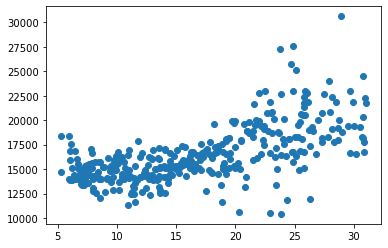

In [26]:
plt.scatter(x,y)

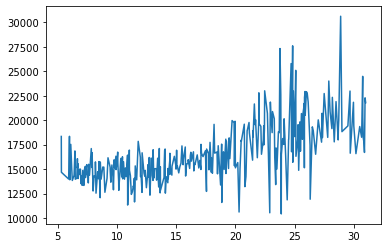

In [31]:
plt.plot(x,y)

In [28]:
g_acc_df.to_csv("average_groupby_loan_amount.csv")

In [3]:
rej_df = pd.read_csv("Resources/lending_club_rejected.csv")

rej_df.isna().sum()



NameError: name 'pd' is not defined

In [4]:
rej_df1 = rej_df.drop(["Risk_Score","Employment Length"], axis=1)

NameError: name 'rej_df' is not defined

In [5]:
rej_df2 = rej_df1.dropna()



NameError: name 'rej_df1' is not defined

In [17]:
rej_df3 = rej_df2.sample(n = 79007)

rej_df3

,Amount Requested,Application Date,Loan Title,Debt-To-Income Ratio,Zip Code,State,Policy Code
378646,28000.0,2018-04-27,Debt consolidation,100%,800xx,CO,0.0
157002,13400.0,2017-05-08,Other,35.37%,946xx,CA,0.0
216669,10000.0,2014-07-13,debt_consolidation,20.96%,067xx,CT,0.0
566579,1000.0,2013-05-13,credit_card,15.64%,115xx,NY,0.0
25256,15000.0,2018-06-12,Other,16.24%,113xx,NY,0.0
...,...,...,...,...,...,...,...
640652,1800.0,2017-12-19,Other,8.51%,334xx,FL,0.0
95282,1000.0,2015-01-01,moving,0.31%,151xx,PA,0.0
274913,10000.0,2013-05-04,credit_card,33.07%,087xx,NJ,0.0
209595,1000.0,2018-12-02,Other,1.15%,487xx,MI,0.0


In [19]:
acc_df3.to_csv("acc.csv"

In [1]:
acc_df3

NameError: name 'acc_df3' is not defined

In [20]:
rej_df3.to_csv("rej.csv")

In [14]:
acc_df3.merge(rej_df3, how='inner', on='State')



KeyboardInterrupt: 